# Data Science Basics - Principal Component Analysis(PCA) - Complete Guide

#### Principal Component Analysis(PCA)
According to Wikipedia, PCA is a statistical procedure that uses an orthogonal transformation to convert a set of observations of possibly correlated variables (entities each of which takes on various numerical values) into a set of values of linearly uncorrelated variables called principal components.
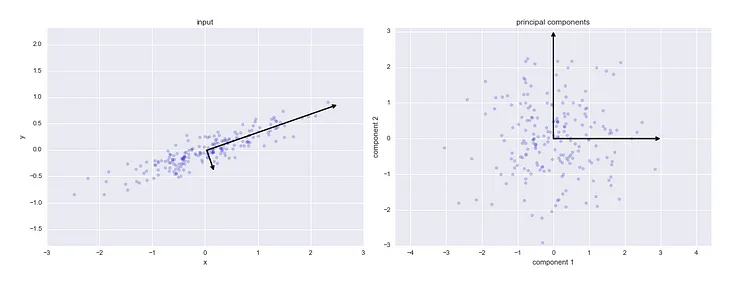

#### Principal components
These are the new axes that descibe the variation in the data.

 - Principal component 1: The axis which spans the most variation of the data.
 - Principal component 2: The axis which spans the second most variation of the data.
 - Principal component 3: The axis which spans the third most variation of the data and so on.

#### When to use PCA
We can use PCA in the following cases:

#### Data Visualization.
 - It is used to find inter-relation between variables in the data.
 - Speeding Machine Learning (ML) Algorithm.
 - It’s often used to visualize genetic distance and relatedness between populations.
 - As number of variables are decreasing it makes further analysis simpler.

#### Objectives of PCA
The main objectives of the PCA are:

 - It is basically a non-dependent procedure in which it reduces attribute space from a large number of variables to a smaller number of factors.
 - PCA is basically a dimension reduction process but there is no guarantee that the dimension is interpretable.
 - Main task in this PCA is to select a subset of variables from a larger set, based on which original variables have the highest correlation with the principal amount.
 
#### How to do PCA?
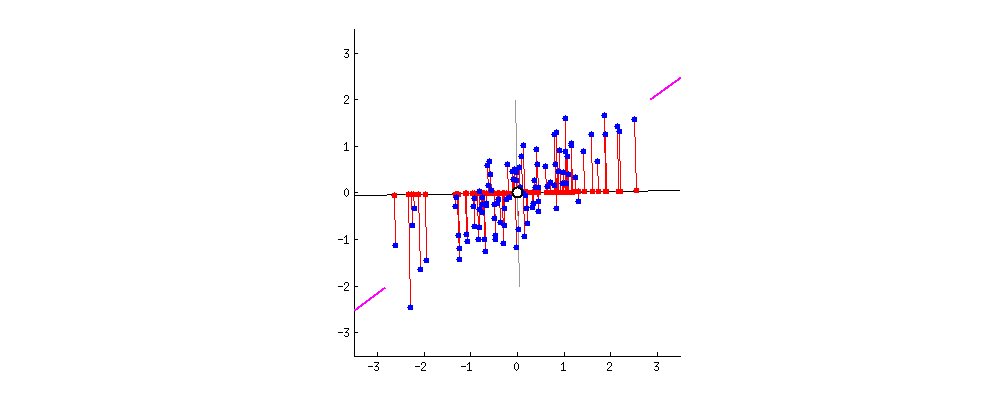

As there are as many principal components as there are variables in the data, principal components are constructed in such a manner that the first principal component accounts for the largest possible variance in the data set .

The second principal component is calculated in the same way, with the condition that it is uncorrelated with (i.e., perpendicular to) the first principal component and that it accounts for the next highest variance.

Once fit, the eigenvalues and principal components can be accessed on the PCA class via the explained_variance_ and components_ attributes.

#### Principal Axis Method
PCA will search a linear combination of variables so that we can extract maximum variance from the variables. Once this process completes it will remove it and search for another linear combination which will give an explanation about the maximum proportion of remaining variance which basically leads to orthogonal factors. In this method, we analyze total variance.

#### PCA Summary
From the following figure, I will make you understand how PCA works in a nutshell.

There are few steps, Let’s see one after other:

 - In the first step we have a correlated high dimenasion data. And then we calculate the center of the points and calculate variance of the data by using covariance matrix of the data and with this matrix we calculate eigen vectors and eigen values.
 - After calculating these, we pick the value of m such that less than original dimension.
 - Then after we will project` data points into thoseeigen vectorsand we do the inverse transform so we will getuncorrelated low dimensional` data.

Though mathematically it looks little bit complex but fortunately in python we have sklearn library there we have PCA package just we call PCA() and then call pca.fit() as usual we do in ML algorithms.

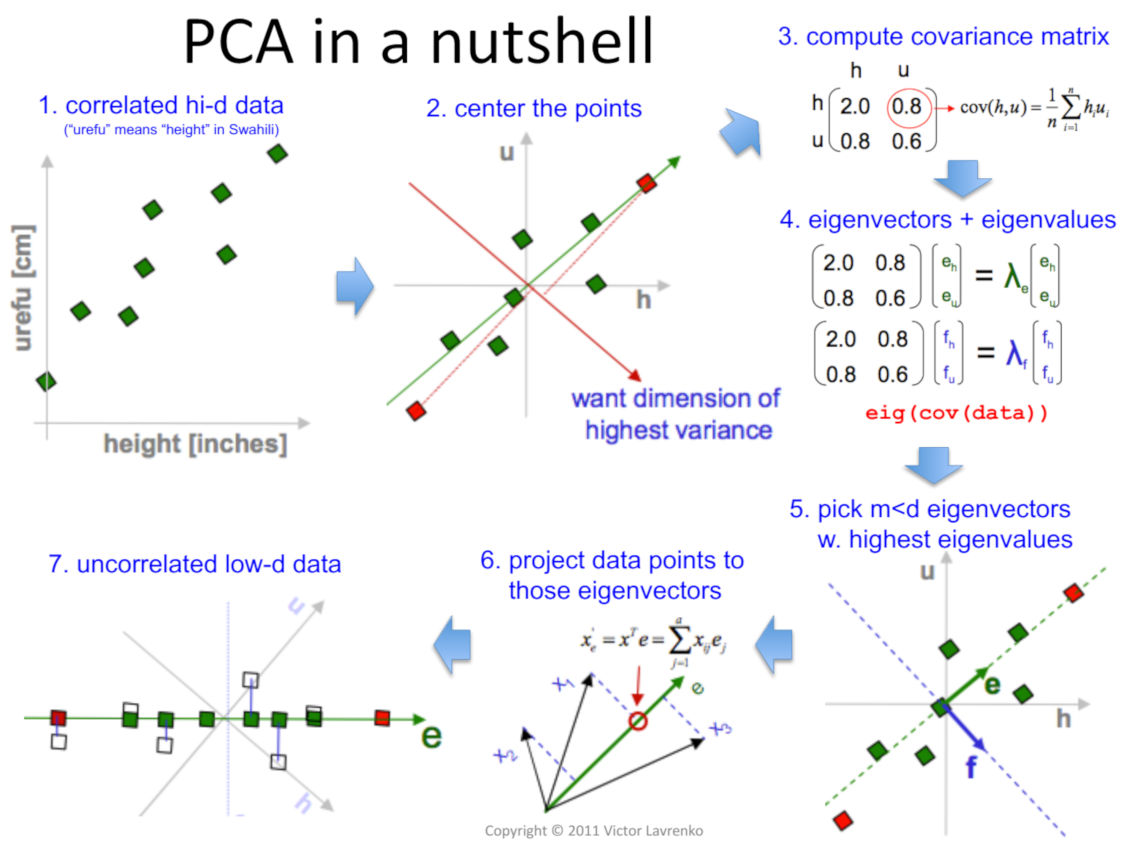

In [1]:
import pandas as pd
import numpy as np
import  seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split

In [3]:
cancer = datasets.load_breast_cancer()


In [4]:
print(cancer.DESCR)


.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

This data has 30-dimensions that is 30 features. Let’s visualize the data set with dataframe.

In [5]:
df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


If we see here scale of the each feature is different that is dome features are in the range 10s some are in 100s. It is better to standardize our data for better visualization.

Let’s see the below code:

In [6]:
from sklearn.preprocessing import StandardScaler

In [8]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)
X_scaled[: 2]

array([[ 1.09706398e+00, -2.07333501e+00,  1.26993369e+00,
         9.84374905e-01,  1.56846633e+00,  3.28351467e+00,
         2.65287398e+00,  2.53247522e+00,  2.21751501e+00,
         2.25574689e+00,  2.48973393e+00, -5.65265059e-01,
         2.83303087e+00,  2.48757756e+00, -2.14001647e-01,
         1.31686157e+00,  7.24026158e-01,  6.60819941e-01,
         1.14875667e+00,  9.07083081e-01,  1.88668963e+00,
        -1.35929347e+00,  2.30360062e+00,  2.00123749e+00,
         1.30768627e+00,  2.61666502e+00,  2.10952635e+00,
         2.29607613e+00,  2.75062224e+00,  1.93701461e+00],
       [ 1.82982061e+00, -3.53632408e-01,  1.68595471e+00,
         1.90870825e+00, -8.26962447e-01, -4.87071673e-01,
        -2.38458552e-02,  5.48144156e-01,  1.39236330e-03,
        -8.68652457e-01,  4.99254601e-01, -8.76243603e-01,
         2.63326966e-01,  7.42401948e-01, -6.05350847e-01,
        -6.92926270e-01, -4.40780058e-01,  2.60162067e-01,
        -8.05450380e-01, -9.94437403e-02,  1.80592744e+

#### PCA( )
#### Principal Component Analysis
Linear dimensionality reduction using Singular Value Decomposition of the data to project it to a lower dimensional space. The input data is centered but not scaled for each feature before applying the SVD.
Applying the PCA() function into training and testing set for analysis.

Let’s discuss some important paameters of the function PCA():

#### n_components
It is a int, float, None or str. Number of components to keep.
#### random_state
It is to pass an int for reproducible results across multiple function calls.
#### explained_variance
It is provide the amount of variance explained by each of the selected components.
#### fit_transform
It helps to fit the model with X and apply the dimensionality reduction on X.
#### inverse_transform
It transforms data back to its original space.

We need to have 2-dimensional data set so n_component is equal to 2 and we can get same result random_state if we use same random_state.

Applying the PCA function into training and testing set for analysis look at the following code:

Fit the model X_scaled by using pac.fit():

In [9]:
from sklearn.decomposition import PCA

In [10]:
pca = PCA(n_components=2, random_state=42)
pca.fit(X_scaled)
PCA(n_components=2, random_state=42)

PCA(n_components=2, random_state=42)

Training has been done now let’s go ahead to transform it with pca.transform():

In [11]:
X_pca = pca.transform(X_scaled)

So we transformed the data into 2-dimensions.
Let’s check the shape of both data sets:

In [12]:
X_scaled.shape, X_pca.shape

((569, 30), (569, 2))

Here we can observe shape of default data is 30 and after transformation it reduced to 2.

Now we will try to plot the scattering points for the second principal component and first principal component by using plt.scatter() function.
Let’s look into the following script:

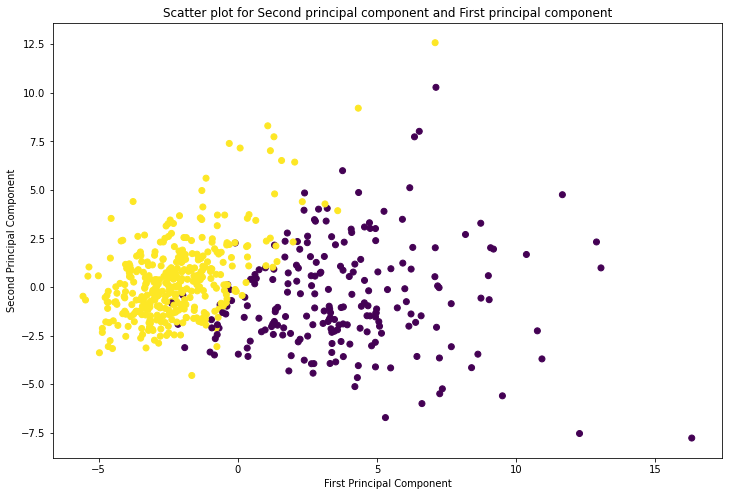

In [14]:
plt.figure(figsize=(12,8))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c = cancer.target, cmap = 'viridis')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('Scatter plot for Second principal component and First principal component')
plt.show()

From the above plot we can observe, first principal component has high variance compared to second principal component.

In [15]:
pca.explained_variance_ratio_

array([0.44272026, 0.18971182])

Now we will observe the respective variances for the components by using bar graph.
See the following plot:

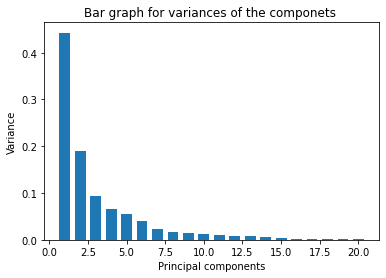

In [17]:
pca = PCA(n_components=20, random_state=42)
X_pca = pca.fit_transform(X_scaled)
variance = pca.explained_variance_ratio_
plt.ylabel('Variance')
plt.xlabel('Principal components')
plt.title('Bar graph for variances of the componets ')
plt.bar(x = range(1, len(variance)+1), height=variance, width=0.7)
plt.show()

In [18]:
variance

array([0.44272026, 0.18971182, 0.09393163, 0.06602135, 0.05495768,
       0.04024522, 0.02250734, 0.01588724, 0.01389649, 0.01168978,
       0.00979719, 0.00870538, 0.00804525, 0.00523366, 0.00313783,
       0.00266209, 0.00197997, 0.00175396, 0.00164925, 0.00103865])